Epoch 1/750
79/79 [==============================] - 1s 4ms/step - loss: 0.7154 - val_loss: 0.1743
Epoch 2/750
79/79 [==============================] - 0s 3ms/step - loss: 0.2773 - val_loss: 0.0383
Epoch 3/750
79/79 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.0198
Epoch 4/750
79/79 [==============================] - 0s 3ms/step - loss: 0.1238 - val_loss: 0.0154
Epoch 5/750
79/79 [==============================] - 0s 3ms/step - loss: 0.1108 - val_loss: 0.0131
Epoch 6/750
79/79 [==============================] - 0s 2ms/step - loss: 0.1004 - val_loss: 0.0114
Epoch 7/750
79/79 [==============================] - 0s 2ms/step - loss: 0.0902 - val_loss: 0.0098
Epoch 8/750
79/79 [==============================] - 0s 2ms/step - loss: 0.0839 - val_loss: 0.0079
Epoch 9/750
79/79 [==============================] - 0s 2ms/step - loss: 0.0779 - val_loss: 0.0074
Epoch 10/750
79/79 [==============================] - 0s 2ms/step - loss: 0.0737 - val_loss: 0.0068
Epoch 11/

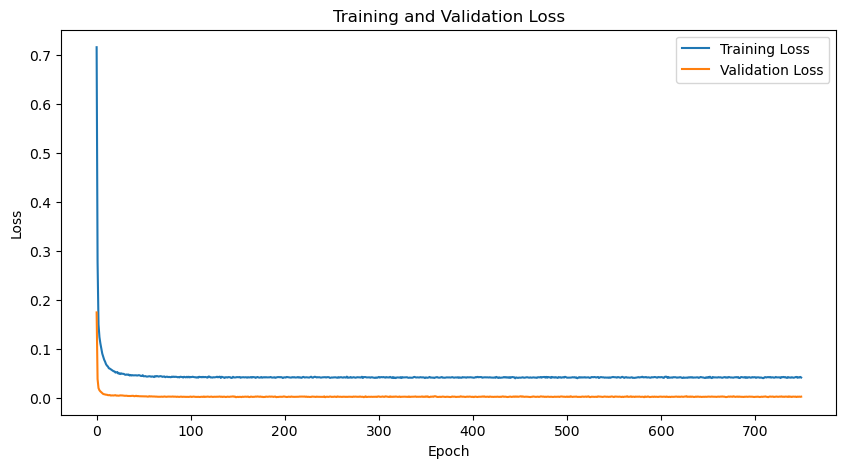

Enter a value for x: 120
Enter a value for y: 40
1/1 [==============================] - 0s 224ms/step
Predicted theta1: -32.367679595947266
Predicted theta2: 101.86918640136719


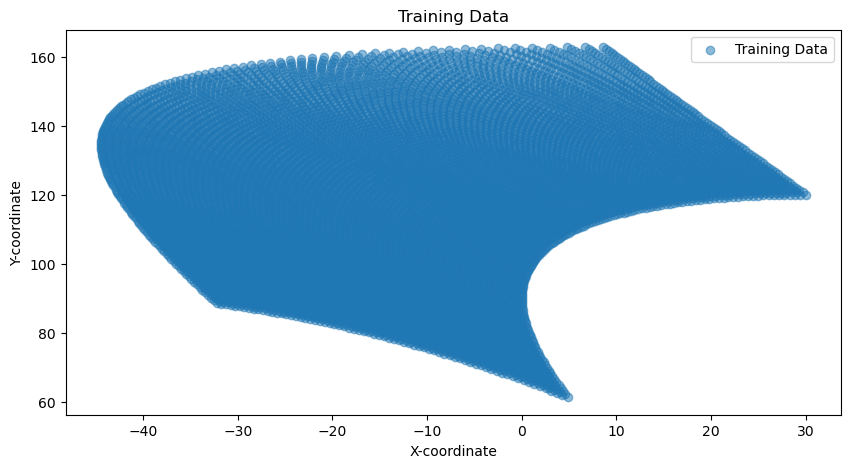

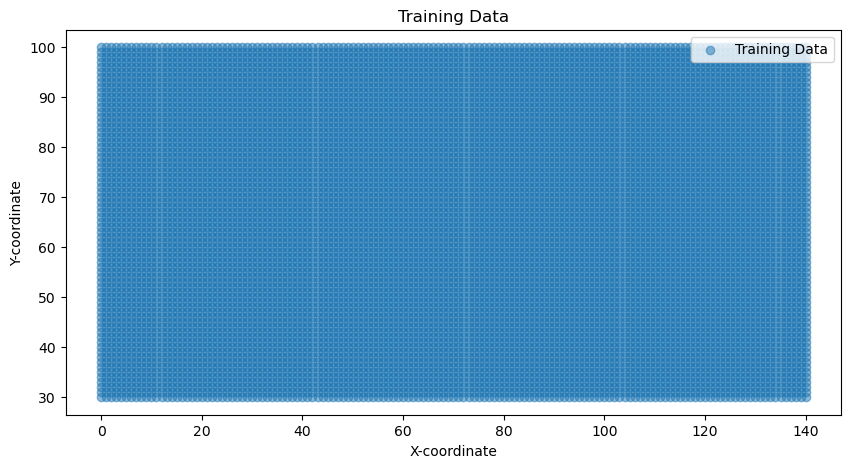

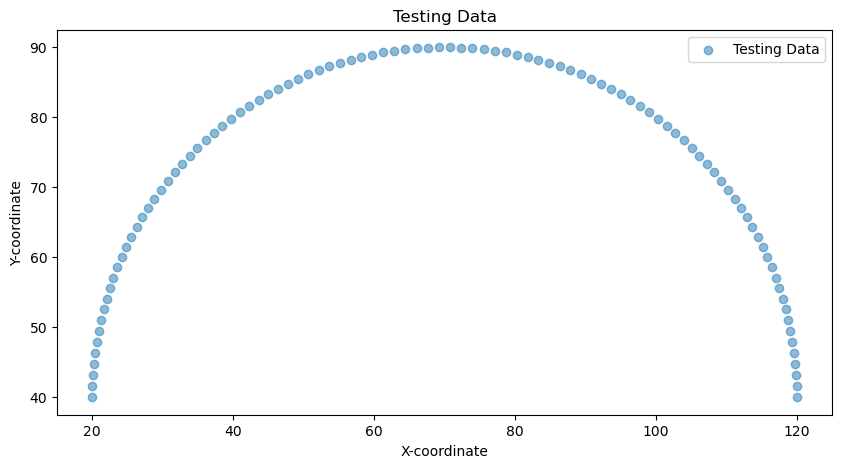

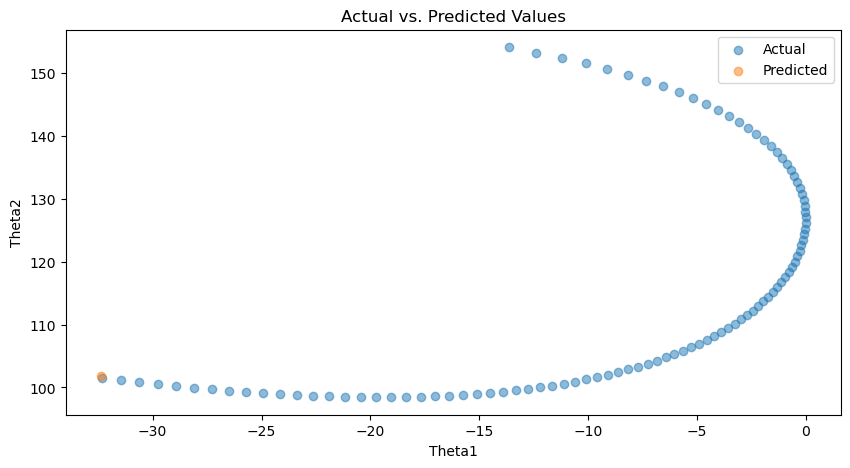

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load the CSV files into pandas dataframes
theta1_data = pd.read_csv('50rt1.csv')
theta2_data = pd.read_csv('50rt2.csv')
x_data = pd.read_csv('50xre.csv')
y_data = pd.read_csv('50yre.csv')
x1_data = pd.read_csv('50xs.csv')
y1_data = pd.read_csv('50ys.csv')
theta3_semi_data = pd.read_csv('50st1.csv')
theta4_semi_data = pd.read_csv('50st2.csv')

# Merge the dataframes into one
data = pd.concat([theta1_data, theta2_data, x_data, y_data], axis=1)
data1 = pd.concat([theta3_semi_data, theta4_semi_data, x1_data, y1_data], axis=1)

# Drop rows with NaN values in train_data and test_data
train_data = data.dropna()
test_data = data1.dropna()

# Extract features (x and y) and targets (theta1 and theta2) from the data
x_train = train_data[['x', 'y']].values
y_train = train_data[[train_data.keys()[0], train_data.keys()[1]]].values
x_test = test_data[['x-coordinate', 'y-coordinate']].values
y_test = test_data[['Theta1semi', 'Theta2_semi']].values

# Preprocess the data using standardization
scalerLin = StandardScaler()
scalerAngle = StandardScaler()
x_train_scaled = scalerLin.fit_transform(x_train)
x_test_scaled = scalerLin.transform(x_test)

y_train_scaled = scalerAngle.fit_transform(y_train)
y_test_scaled = scalerAngle.transform(y_test)

# Define the neural network architecture (simpler model)
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, input_shape=(2,), activation='linear'),
    keras.layers.Dense(2)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


# Create lists to store training and validation loss
train_loss = []
val_loss = []

# Train the model on the training data

history = model.fit(x_train_scaled, y_train_scaled, epochs=750, batch_size=128, validation_data=(x_test_scaled, y_test_scaled))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Get user input for x and y
x_input = float(input("Enter a value for x: "))
y_input = float(input("Enter a value for y: "))

# Normalize the user input
input_data = scalerLin.transform(np.array([[x_input, y_input]]))

# Make predictions using the trained model
predictions_scaled = model.predict(input_data)
# Denormalize the predictions
predictions = scalerAngle.inverse_transform(predictions_scaled)

# Print the predicted values for theta1 and theta2
print(f"Predicted theta1: {predictions[0][0]}")
print(f"Predicted theta2: {predictions[0][1]}")

# Plot training data

plt.figure(figsize=(10, 5))
plt.scatter(y_train[:, 0], y_train[:, 1], label='Training Data', alpha=0.5)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('Training Data')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], label='Training Data', alpha=0.5)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('Training Data')
plt.show()

# Plot testing data
plt.figure(figsize=(10, 5))
plt.scatter(x_test[:, 0], x_test[:, 1], label='Testing Data', alpha=0.5)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('Testing Data')
plt.show()

# Plot the prediction with actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test[:, 0], y_test[:, 1], label='Actual', alpha=0.5)
plt.scatter(predictions[:, 0], predictions[:, 1], label='Predicted', alpha=0.5)
plt.xlabel('Theta1')
plt.ylabel('Theta2')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()


1/1 [==============================] - 0s 51ms/step


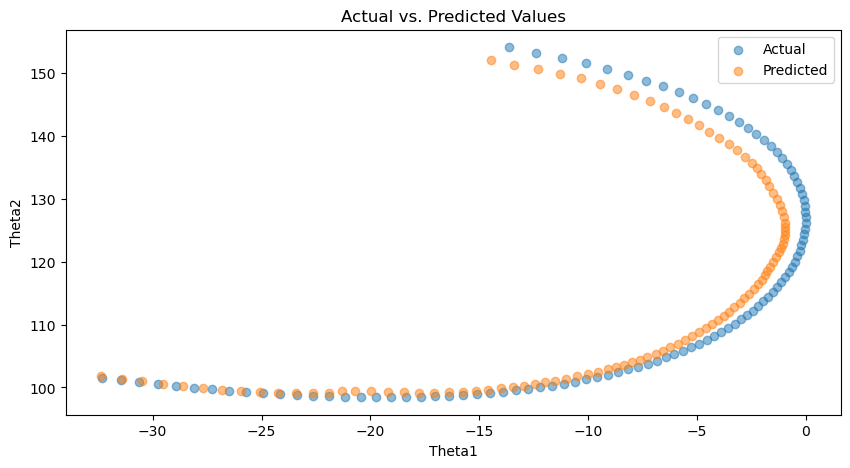

In [2]:
pred=[]
for i in range(len(x_test)):
    
    input_data = scalerLin.transform(np.array([[x_test[i][0], x_test[i][1]]]))
    predictions_scaled = model.predict(input_data)
    predictions= scalerAngle.inverse_transform(predictions_scaled)
    pred.append(predictions)
    
#convert to np.array
pred_list = [np.array(arr) for arr in pred]
flattened_pred = [arr.flatten() for arr in pred_list]
preds=np.array(flattened_pred)

plt.figure(figsize=(10, 5))
plt.scatter(y_test[:, 0], y_test[:, 1], label='Actual', alpha=0.5)
plt.scatter(preds[:, 0], preds[:, 1], label='Predicted', alpha=0.5)
plt.xlabel('Theta1')
plt.ylabel('Theta2')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

In [3]:
# Calculate MSE for training dataset
train_mse = model.evaluate(x_train_scaled, y_train_scaled, verbose=0)
print(f"Training MSE: {train_mse:.4f}")

# Calculate MSE for validation dataset
val_mse = model.evaluate(x_test_scaled, y_test_scaled, verbose=0)
print(f"Validation MSE: {val_mse:.4f}")


Training MSE: 0.0046
Validation MSE: 0.0024


In [4]:
# Get user input for x and y

x_input = float(input("Enter a value for x: "))
y_input = float(input("Enter a value for y: "))

# Normalize the user input
input_data = scalerLin.transform(np.array([[x_input, y_input]]))

# Make predictions using the trained model
predictions_scaled = model.predict(input_data)

# Denormalize the predictions
predictions = scalerAngle.inverse_transform(predictions_scaled)

# Print the predicted values for theta1 and theta2
print(f"Predicted theta1: {predictions[0][0]}")
print(f"Predicted theta2: {predictions[0][1]}")



Enter a value for x: 120
Enter a value for y: 40
1/1 [==============================] - 0s 48ms/step
Predicted theta1: -32.367679595947266
Predicted theta2: 101.86918640136719


1/1 [==============================] - 0s 49ms/step


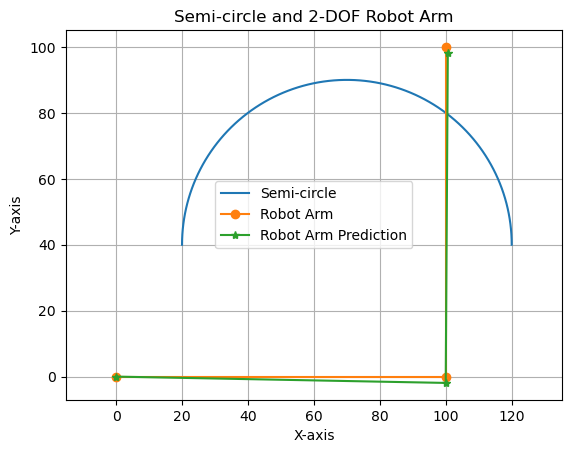

In [9]:
import math
import numpy as np
import time

a1=a2=100
def get_pred(x,y):
    input_data = scalerLin.transform(np.array([[x,y]]))
    predictions_scaled = model.predict(input_data)
    predictions= scalerAngle.inverse_transform(predictions_scaled)
    theta1 = np.radians(predictions[0][0])
    theta2 = np.radians(predictions[0][1])
    return theta1,theta2

def inverse(x,y):
    theta2 = np.arccos((x**2+y**2-a1**2-a2**2)/(2*a1*a2))
    theta1 = np.arctan2(y, x) - np.arctan2(a2*np.sin(theta2), a1 + a2*np.cos(theta2))
    return[math.degrees(theta1),math.degrees(theta2)]

def forward_plot(theta1,theta2,radius,x_offset,y_offset):
    
    x_ee = a1 * np.cos(theta1) + a2 * np.cos(theta1 + theta2)
    y_ee = a1 * np.sin(theta1) + a2 * np.sin(theta1 + theta2)
    return x_ee,y_ee


def inverse_plot_semi(x,y,radius,x_offset,y_offset):
    
    center = (x_offset, y_offset)
    theta_semi_circle = np.linspace(0, np.pi, 100)
    x_semi_circle = radius * np.cos(theta_semi_circle) + center[0]
    y_semi_circle = radius * np.sin(theta_semi_circle) + center[1]
    plt.plot(x_semi_circle, y_semi_circle, label='Semi-circle')
    plt.title('Semi-circle and 2-DOF Robot Arm')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    
    theta1,theta2=inverse(x,y)
    t1,t2=theta1,theta2
    
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    x_ee = a1 * np.cos(theta1) + a2 * np.cos(theta1 + theta2)
    y_ee = a1 * np.sin(theta1) + a2 * np.sin(theta1 + theta2)
    plt.plot([0, a1 * np.cos(theta1), x_ee], [0, a1 * np.sin(theta1), y_ee], marker='o', label='Robot Arm')
    
    
    Theta1,Theta2=get_pred(x,y)
    x_ee_pred,y_ee_pred=forward_plot(Theta1,Theta2,radius,x_offset,y_offset)
    plt.plot([0, a1 * np.cos(Theta1), x_ee_pred], [0, a1 * np.sin(Theta1), y_ee_pred], marker='*', label='Robot Arm Prediction')
    
    plt.grid(True)
    plt.axis('equal')  # Set equal scaling for the axes
    plt.legend()
    plt.show()


inverse_plot_semi(100,100,50,70,40)

20.0 30.000000000000007
1/1 [==============================] - 0s 52ms/step


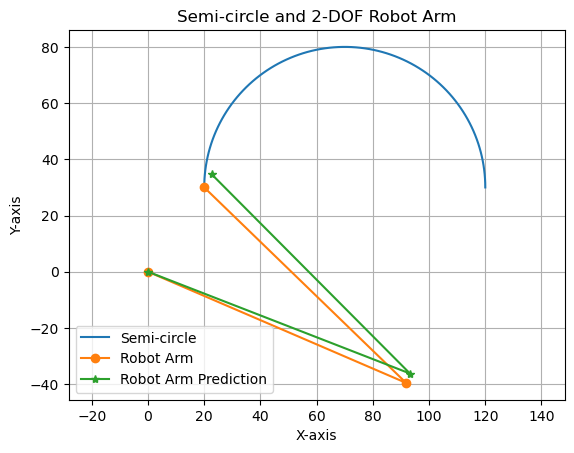

In [10]:
radius = 50
x_offset = 70
y_offset = 30
center = (x_offset, y_offset)
theta_semi_circle = np.linspace(0, np.pi, 100)
x_semi_circle = radius * np.cos(theta_semi_circle) + center[0]
y_semi_circle = radius * np.sin(theta_semi_circle) + center[1]
import time
from IPython.display import clear_output
for i in range(0,100,1):
    print(x_semi_circle[i],y_semi_circle[i])
    inverse_plot_semi(x_semi_circle[i], y_semi_circle[i], 50, 70, 30)
    time.sleep(1)
    clear_output(wait=True)

In [7]:
def forward(theta1,theta2):
    theta1=np.radians(theta1)
    theta2=np.radians(theta2)
    x_ee = a1 * np.cos(theta1) + a2 * np.cos(theta1 + theta2)
    y_ee = a1 * np.sin(theta1) + a2 * np.sin(theta1 + theta2)
    return x_ee,y_ee

forward(-16.224334716796875,99.054931640625)

(108.4978515246477, 71.27825522421264)